In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [23]:
batch_size = 32
img_height = 227
img_width = 227
epochs =100
data_dir = 'Palm.zip'

In [24]:
import zipfile
with zipfile.ZipFile(data_dir,'r') as zip_ref:
  zip_ref.extractall()

In [25]:
import os
import random
import shutil

# Define the dataset directory
dataset = 'Palm'

# Define the output directory and subdirectories for train, validation, and test sets
output_folder = 'New_train_test'
train_folder = os.path.join(output_folder, 'train')
val_folder = os.path.join(output_folder, 'val')
test_folder = os.path.join(output_folder, 'test')

# Define the class labels
classes = ['anemic', 'non-anemic']

# Create directories for train, validation, and test sets with subdirectories for each class
for split_folder in [train_folder, val_folder, test_folder]:
    for cls in classes:
        os.makedirs(os.path.join(split_folder, cls), exist_ok=True)

# List all images in the dataset and shuffle them randomly
all_images = [img for img in os.listdir(dataset) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
random.shuffle(all_images)

# Verify the number of images in the dataset
print(f"Total images found in dataset: {len(all_images)}")

# Define the split ratios for train, validation, and test sets
train_ratio = 0.80
val_ratio = 0.10
test_ratio = 0.10

# Calculate the number of images for each split
total_images = len(all_images)
train_count = int(total_images * train_ratio)
val_count = int(total_images * val_ratio)
test_count = total_images - train_count - val_count

# Split the images into train, validation, and test sets
train_images = all_images[:train_count]
val_images = all_images[train_count:train_count + val_count]
test_images = all_images[train_count + val_count:]

# Function to determine the class label from the image name
def get_class_label(image_name):
    if image_name.startswith(("Anemic", "AnemicP", "Anemic-Pa")):
        return 'anemic'
    elif image_name.startswith(("Non-AnemicP", "Non-anemic-Pa")):
        return 'non-anemic'
    else:
        return None

# Function to copy images to the respective class directories under each split directory
def copy_images(image_list, split_folder):
    for image in image_list:
        class_label = get_class_label(image)
        if class_label:
            src_path = os.path.join(dataset, image)
            dst_path = os.path.join(split_folder, class_label, image)
            shutil.copyfile(src_path, dst_path)

# Copy the images to the respective directories
copy_images(train_images, train_folder)
copy_images(val_images, val_folder)
copy_images(test_images, test_folder)

# Print the split summary
print(f"Total images: {total_images}")
print(f"Training images: {train_count}")
print(f"Validation images: {val_count}")
print(f"Test images: {test_count}")



Total images found in dataset: 4260
Total images: 4260
Training images: 3408
Validation images: 426
Test images: 426


In [26]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(output_folder, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(output_folder, 'val'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(output_folder, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 3408 images belonging to 2 classes.
Found 426 images belonging to 2 classes.
Found 426 images belonging to 2 classes.


In [27]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential

In [29]:
from keras.layers import Dropout
from keras.regularizers import l2

def model_building():
  model=Sequential()

  #Layer 1
  model.add(Conv2D(64,(3,3),activation='relu',strides=(2,2),padding='same',input_shape=(img_height,img_width,3),kernel_regularizer=l2(0.0001)))
  model.add(MaxPooling2D((2,2)))
  model.add(BatchNormalization())

  #Layer 2
  model.add(Conv2D(64,(3,3),activation='relu',strides=(2,2),padding='same',kernel_regularizer=l2(0.0001)))
  model.add(MaxPooling2D((2,2)))
  model.add(BatchNormalization())


  #Layer 3
  model.add(Conv2D(64,(3,3),activation='relu',strides=(2,2),padding='same',kernel_regularizer=l2(0.0001)))
  model.add(MaxPooling2D((2,2)))

  # Layer 4
  model.add(Conv2D(128,(3,3),activation='relu',strides=(2,2),padding='same',kernel_regularizer=l2(0.0001)))
  model.add(MaxPooling2D((2,2)))


  model.add(Flatten())

  #Fully connected layer
  #model.add(Dense(4000, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1000,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(100,activation='relu'))

  #Output layer
  model.add(Dense(1, activation='sigmoid'))

  return model



In [10]:
# def model_building():
#     model = Sequential()

#     # Layer 1
#     model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same', input_shape=(img_height, img_width, 3)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(BatchNormalization())

#     # Layer 2
#     model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(BatchNormalization())

#     # Layer 3
#     model.add(Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(BatchNormalization())

#     # Layer 4
#     model.add(Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(BatchNormalization())

#     model.add(Flatten())

#     # Fully connected layer
#     model.add(Dense(1024, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(256, activation='relu'))

#     # Output layer
#     model.add(Dense(1, activation='sigmoid'))

#     return model


In [30]:
from keras.layers import BatchNormalization
model = model_building()
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 114, 114, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 57, 57, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 57, 57, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       129,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │       100,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 379,217 (1.45 MB)

 Trainable params: 378,961 (1.45 MB)

 Non-trainable params: 256 (1.00 KB)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint= ModelCheckpoint(
    filepath='16_07_2024.weights.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)
#early_stopping = EarlyStopping(monitor='val_loss',mode='min',patience=20)
callbacks = [checkpoint]


In [14]:
model.load_weights('16_07_2024.weights.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '16_07_2024.weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [35]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9796 - loss: 0.1263
Epoch 1: val_loss improved from inf to 0.65767, saving model to 16_07_2024.weights.h5
107/107 ━━━━━━━━━━━━━━━━━━━━ 23s 209ms/step - accuracy: 0.9796 - loss: 0.1263 - val_accuracy: 0.8498 - val_loss: 0.6577
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9838 - loss: 0.1278
Epoch 2: val_loss improved from 0.65767 to 0.57675, saving model to 16_07_2024.weights.h5
107/107 ━━━━━━━━━━━━━━━━━━━━ 28s 256ms/step - accuracy: 0.9839 - loss: 0.1277 - val_accuracy: 0.8709 - val_loss: 0.5767
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9881 - loss: 0.1018
Epoch 3: val_loss did not improve from 0.57675
107/107 ━━━━━━━━━━━━━━━━━━━━ 27s 244ms/step - accuracy: 0.9881 - loss: 0.1019 - val_accuracy: 0.8521 - val_loss: 0.6217
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9820 - loss: 0.1207
Epoch 4: val_loss improved from 0.57675 to 0.50802, saving mo

In [ ]:
model.save('best.weights.keras')

Completed epochs: 31


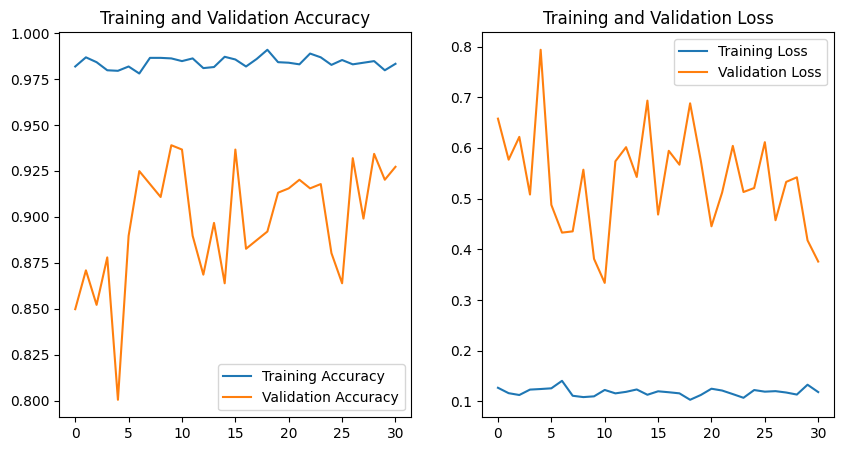

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Determine the number of completed epochs
completed_epochs = len(acc)
print(f"Completed epochs: {completed_epochs}")

# Adjust the epochs range for plotting
epochs_range = range(completed_epochs)

# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Save the plot
plt.savefig('100epochs.png')
plt.show()